In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns
import plotly.express as px

import sys

In [113]:
# Read html tables from wikipedia
dec_outbreak = pd.read_html('https://en.wikipedia.org/wiki/Tornado_outbreak_of_December_10%E2%80%9311,_2021', header=0)

In [114]:
dec_10_system = dec_outbreak[4]
dec_11_system = dec_outbreak[5]

In [115]:
# Add a date column for both
dec_10_system['date_occured'] = '12-10-21'
dec_11_system['date_occured'] = '12-11-21'

In [116]:
# Combine both df's
two_day_system = pd.concat([dec_10_system, dec_11_system])

In [118]:
# drop coordinates of origin for reliability and easier df to work with, no role in this project
two_day_system.drop('Start Coord.', axis=1, inplace=True)

In [119]:
# Lets work with just the dec. 10th data for now, start by splitting path length and width into two columns (mi and km)
two_day_system['Path_Length_mi'] = two_day_system['Path length'].str.replace(r"\(.*\)","").str.strip()
two_day_system['Path_Length_km'] = two_day_system['Path length'].str.replace(r'[^(]*\(|\)[^)]*', '').str.strip()
two_day_system['Width_yd'] = two_day_system['Max width'].str.replace(r"\(.*\)","").str.strip()
two_day_system['Width_m'] = two_day_system['Max width'].str.replace(r'[^(]*\(|\)[^)]*', '').str.strip()


# Drop original path length column
two_day_system.drop('Path length', axis=1, inplace=True)
two_day_system.drop('Max width', axis=1, inplace=True)

C:\Users\colts\AppData\Local\Temp/ipykernel_13108/2541159907.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\colts\AppData\Local\Temp/ipykernel_13108/2541159907.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\colts\AppData\Local\Temp/ipykernel_13108/2541159907.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\colts\AppData\Local\Temp/ipykernel_13108/2541159907.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [120]:
# Rename these columns to be more pythonic
two_day_system.rename(columns={'EF#':'Fujita_Rating', 'County / Parish':'County', 'Time (UTC)':'Time_UTC'}, inplace=True)

In [121]:
# remove units at end of lengths and widths
two_day_system['Path_Length_mi'] = two_day_system['Path_Length_mi'].str[:-3]
two_day_system['Path_Length_km'] = two_day_system['Path_Length_km'].str[:-3]
two_day_system['Width_yd'] = two_day_system['Width_yd'].str[:-3]
two_day_system['Width_m'] = two_day_system['Width_m'].str[:-2]

In [122]:
# Strip all characters from width
two_day_system['Width_yd'] = two_day_system['Width_yd'].str.replace(',', '')
two_day_system['Width_m'] = two_day_system['Width_m'].str.replace(',', '')

In [123]:
# Convert all to numeric dtypes
two_day_system['Path_Length_mi'] = two_day_system['Path_Length_mi'].apply(pd.to_numeric)
two_day_system['Path_Length_km'] = two_day_system['Path_Length_km'].apply(pd.to_numeric)
two_day_system['Width_yd'] = two_day_system['Width_yd'].apply(pd.to_numeric)
two_day_system['Width_m'] = two_day_system['Width_m'].apply(pd.to_numeric)

In [127]:
two_day_system.sort_values('Fujita_Rating', inplace=True)
two_day_system

,Fujita_Rating,Location,County,State,Time_UTC,Summary,date_occured,Path_Length_mi,Path_Length_km,Width_yd,Width_m
0,EF0,SW of Emerald Mountain,Elmore,AL,22:12,"A brief, weak tornado occurred just northeast ...",12-10-21,0.19,0.31,50,46
6,EF0,W of Bay,Craighead,AR,01:03–01:04,"Trees were downed, and storage buildings susta...",12-10-21,1.20,1.90,50,46
3,EF0,Weiner,Poinsett,AR,00:40–00:43,"Trees were downed in and around town, one of w...",12-10-21,2.90,4.70,50,46
19,EF0,W of Union City,Obion,TN,02:41–02:44,"Trees were downed, and storage buildings were ...",12-10-21,3.10,5.00,80,73
20,EF0,WNW of Union City,Obion,TN,02:43–02:44,Several trees were downed. This was the third ...,12-10-21,0.40,0.64,50,46
...,...,...,...,...,...,...,...,...,...,...,...
14,EF3,SW of Edwardsville,Madison,IL,02:28–02:32,6 deaths – See section on this tornado – The n...,12-10-21,3.65,5.87,300,270
29,EF3,"Newbern, TN to Dresden, TN to Pembroke, KY to ...","Dyer (TN), Gibson (TN), Obion (TN), Weakley (T...","TN, KY",04:32–06:36,See section on this tornado – 13 people were i...,12-10-21,122.91,197.80,1038,949
22,EF4,"Woodland Mills, TN to Cayce, KY to Mayfield, K...","Obion (TN), Fulton (KY), Hickman (KY), Graves ...","TN, KY",02:49–05:47,58 deaths – See article on this tornado – The ...,12-10-21,165.70,266.70,1760,1610
7,EF4,"N of Bay, AR to Monette, AR to Braggadocio, MO...","Craighead (AR), Mississippi (AR), Dunklin (MO)...","AR, MO, TN",01:07–02:36,7 deaths – See section on this tornado – At le...,12-10-21,81.20,130.70,1800,1600


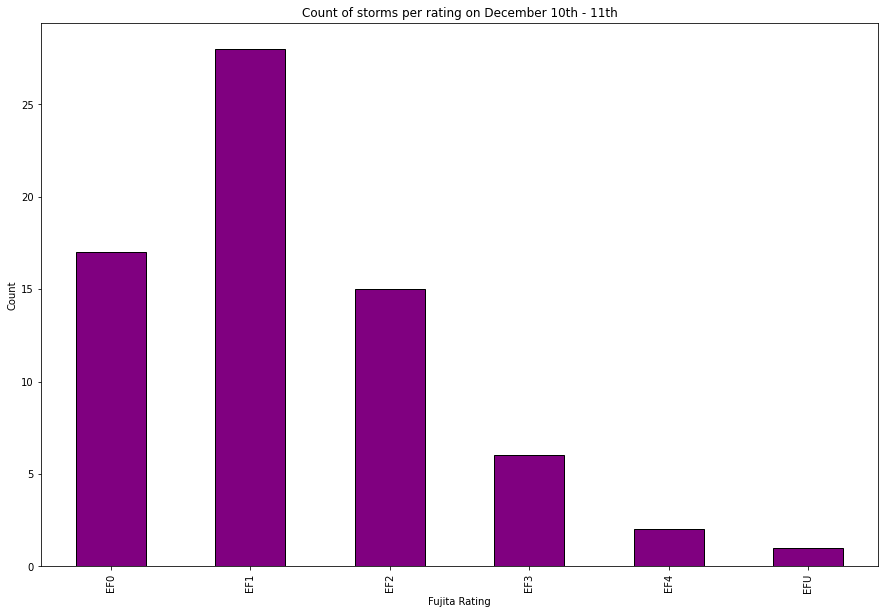

In [125]:
# Make a plot of rating totals
rating_df = two_day_system[['Fujita_Rating']]
grouped_rating = rating_df.groupby('Fujita_Rating').size()

plot_rating = grouped_rating.plot(kind='bar', xlabel='Fujita Rating', ylabel='Count', title='Count of storms per rating on December 10th - 11th', 
figsize=(15,10), color='purple', edgecolor='black')



In [126]:
# Create a 3D plot that plots rating, width, and path length
fig2 = px.scatter_3d(two_day_system, x='Fujita_Rating', y='Path_Length_km', z='Width_m', title='Tornado Rating, Width, and Path Length', color='Fujita_Rating',width=1000, height=1000)
fig2.show()